In [32]:
import pandas as pd
import requests
import json
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Read in all data and converted into usable dataframes

In [33]:
#energy source generation data of energy by state (eia.gov)
#https://www.eia.gov/electricity/data/state/

eiafile = os.path.join('Resources', 'eia.xls')
eai_df = pd.read_excel(eiafile, encoding='UTF-8')

#emissions: emissions and generation resource integrated database (epa.gov)
# https://www.epa.gov/energy/emissions-generation-resource-integrated-database-egrid
# emissionsfile = os.path.join('Project-1', 'Resources', 'eGrid2016.xlsx')
# emissions_df = pd.read_excel(emissionsfile, sheet_name='Table 3', encoding='UTF-8')

emissions_file = os.path.join('Resources', 'targetyears_emissiondata.xlsx')
target_em_df = pd.read_excel(emissions_file, sheet_name='Sheet1', encoding='UTF-8')

master = "Resources/master_final.csv"


# Health respiratory data: Mortality rate for respiratory diseases from 1980-2014 (globalhealthdataexchange)
# http://ghdx.healthdata.org/record/united-states-chronic-respiratory-disease-mortality-rates-county-1980-2014

healthfile = os.path.join('Resources', 'us_resp_mort.xlsx')
health_df = pd.read_excel(healthfile, sheet_name='Summary', encoding='UTF-8')

# labor/wages data: income by year from 1984-2017 (census.gov)
# https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html
#     Table H-8. Median Household Income by State

incomefile = os.path.join('Resources', 'median_income_yearly.xlsx')
income_df = pd.read_excel(incomefile, encoding='UTF-8')

In [34]:
target_em_df = target_em_df[["Year", "State abbreviation", "State annual CO2 emissions (tons)"]]

Respiratory Health Data by Mortality Rate


The Mortality Rate was only measured on a five year basis, so the data needed to be arranged by year in order to be comparable. The statistical analysis was done in order to determine whether the data was statistically significant. Every p-value generated showed that the data itself was significant when compared to the standard p-value = .05.

In [35]:
year_2000 = target_em_df.loc[target_em_df["Year"] ==2000,:]
year_2005 = target_em_df.loc[target_em_df["Year"] ==2005,:]
year_2010 = target_em_df.loc[target_em_df["Year"] ==2010,:]
year_2014 = target_em_df.loc[target_em_df["Year"] ==2014,:]

year_2000_mortality = health_df["Mortality Rate 2000"]
year_2005_mortality = health_df["Mortality Rate 2005"]
year_2010_mortality = health_df["Mortality Rate 2010"]
year_2014_mortality = health_df["Mortality Rate 2014"]

year_2000_emissions = year_2000["State annual CO2 emissions (tons)"]
year_2005_emissions = year_2005["State annual CO2 emissions (tons)"]
year_2010_emissions = year_2010["State annual CO2 emissions (tons)"]
year_2014_emissions = year_2014["State annual CO2 emissions (tons)"]

T_test_2000 = stats.ttest_ind(year_2000_mortality, year_2000_emissions, equal_var=False)
T_test_2005 = stats.ttest_ind(year_2005_mortality, year_2005_emissions, equal_var=False)
T_test_2010 = stats.ttest_ind(year_2010_mortality, year_2010_emissions, equal_var=False)
T_test_2014 = stats.ttest_ind(year_2014_mortality, year_2014_emissions, equal_var=False)

print(T_test_2000)
print(T_test_2005)
print(T_test_2010)
print(T_test_2014)

Ttest_indResult(statistic=-7.397806410084409, pvalue=1.4341865634631328e-09)
Ttest_indResult(statistic=-7.567834175107434, pvalue=7.791400777669312e-10)
Ttest_indResult(statistic=-7.377385595921671, pvalue=1.5433550964637117e-09)
Ttest_indResult(statistic=-7.084355093680925, pvalue=4.428637230619531e-09)


Since the data was significant, we plotted the data through matplotlib in various types of graph to best demonstrate our findings. The graphs are all important; however, the best visualization from the mortality rate data was the Mortality Rate by State ranked from highest to lowest.  

Text(0,0.5,'Mortality Rate')

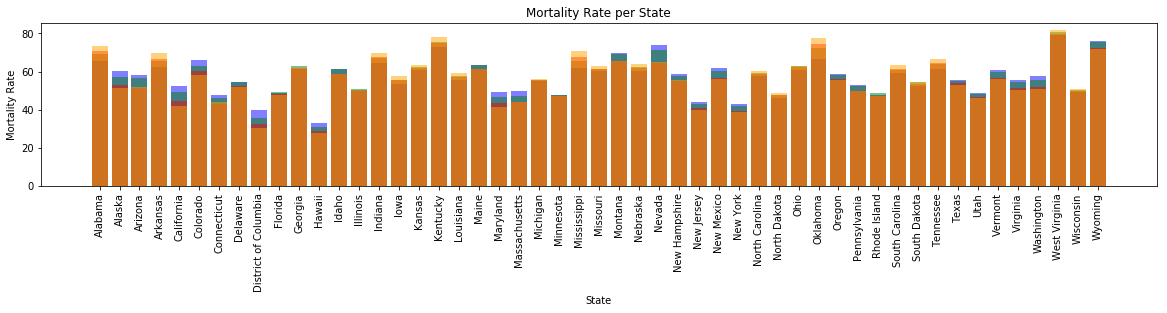

In [36]:
x_axis = np.arange(len(health_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, health_df["Mortality Rate 2000"], color="blue", alpha=0.5, align="edge")
plt.bar(x_axis, health_df["Mortality Rate 2005"], color="green", alpha=0.5, align="edge")
plt.bar(x_axis, health_df["Mortality Rate 2010"], color="red", alpha=0.5, align="edge")
plt.bar(x_axis, health_df["Mortality Rate 2014"], color="orange", alpha=0.5, align="edge")
plt.xticks(tick_locations, health_df["State"], rotation="vertical")

plt.title("Mortality Rate per State")
plt.xlabel("State")
plt.ylabel("Mortality Rate")

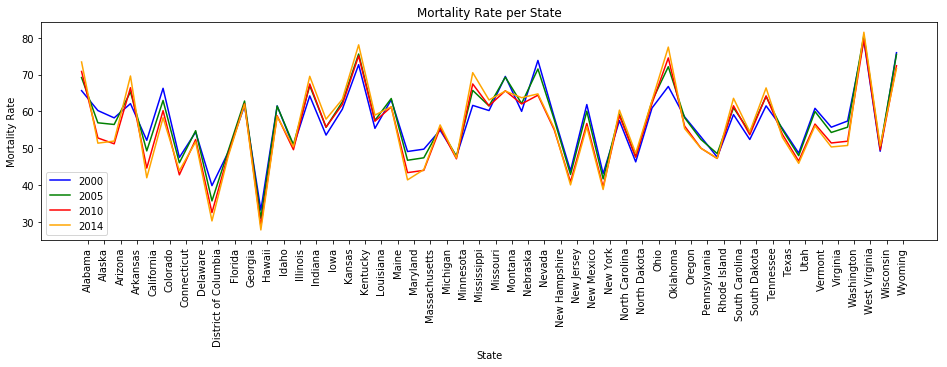

In [37]:
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, health_df["State"], rotation="vertical")
year1 = plt.plot(health_df["State"], health_df["Mortality Rate 2000"], color="blue", label="2000")
year2 = plt.plot(health_df["State"], health_df["Mortality Rate 2005"], color="green", label="2005")
year3 = plt.plot(health_df["State"], health_df["Mortality Rate 2010"], color="red", label="2010")
year4 = plt.plot(health_df["State"], health_df["Mortality Rate 2014"], color="orange", label="2014")
# plt.figure(figsize=(100,10))
plt.subplots_adjust(right=2.2)

plt.title("Mortality Rate per State")
plt.xlabel("State")
plt.ylabel("Mortality Rate")
plt.legend(loc="best")

plt.show()

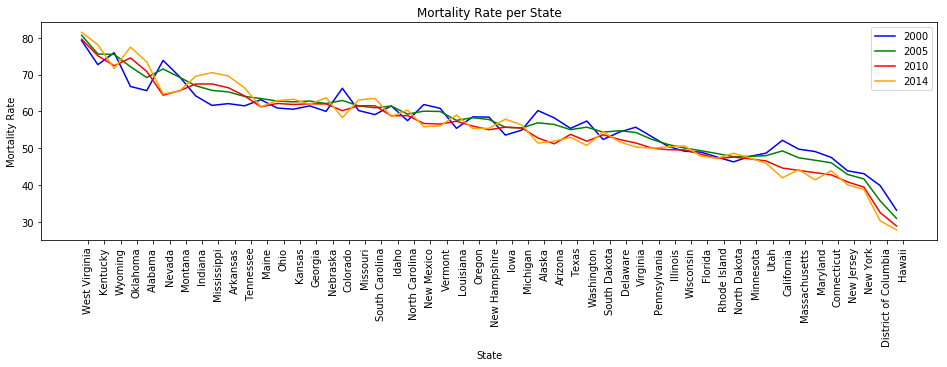

In [38]:
health_df["Average"] = (health_df["Mortality Rate 2000"]+
                       health_df["Mortality Rate 2005"]+
                       health_df["Mortality Rate 2010"]+
                       health_df["Mortality Rate 2014"])/4
sorted_df = health_df.sort_values(by=['Average'], ascending=False)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, sorted_df["State"], rotation="vertical")
year1 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2000"], color="blue", label="2000")
year2 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2005"], color="green", label="2005")
year3 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2010"], color="red", label="2010")
year4 = plt.plot(sorted_df["State"], sorted_df["Mortality Rate 2014"], color="orange", label="2014")
# plt.figure(figsize=(100,10))
plt.subplots_adjust(right=2.2)

plt.title("Mortality Rate per State")
plt.xlabel("State")
plt.ylabel("Mortality Rate")
plt.legend(loc="best")

plt.show()

The Income and Wages data was cleaned before we plotted the data in a line graph in order to show the four years that the mortality rate data was acquired. Then we ran a ttest to compare the income and wages data with the energy source generation data.

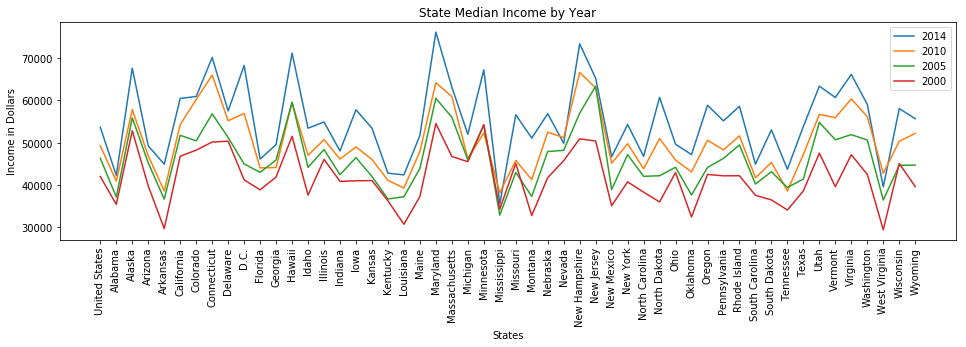

In [39]:
income_df_clean = income_df.dropna(how = 'any')
st8 = income_df_clean['State']
tick_location = np.arange(len(st8))
# tick_locations = [value for value in st8]

k2017 = income_df_clean['2017 Median Income']
k2016 = income_df_clean['2016 Median Income']
k2015 = income_df_clean['2015 Median Income']
k2014 = income_df_clean['2014 Median Income']
k2013 = income_df_clean['2013 Median Income']
k2012 = income_df_clean['2012 Median Income']
k2011 = income_df_clean['2011 Median Income']
k2010 = income_df_clean['2010 Median Income']
k2009 = income_df_clean['2009 Median Income']
k2008 = income_df_clean['2008 Median Income']
k2007 = income_df_clean['2007 Median Income']
k2006 = income_df_clean['2006 Median Income']
k2005 = income_df_clean['2005 Median Income']
k2004 = income_df_clean['2004 Median Income']
k2003 = income_df_clean['2003 Median Income']
k2002 = income_df_clean['2002 Median Income']
k2001 = income_df_clean['2001 Median Income ']
k2000 = income_df_clean['2000 Median Income']

# plt.plot(st8,k2017, label = '2017')
# plt.plot(st8,k2016, label = '2016')
# plt.plot(st8,k2015, label = '2015')
plt.plot(st8,k2014, label = '2014')
# plt.plot(st8,k2013, label = '2013')
# plt.plot(st8,k2012, label = '2012')
# plt.plot(st8,k2011, label = '2011')
plt.plot(st8,k2010, label = '2010')
# plt.plot(st8,k2009, label = '2009')
# plt.plot(st8,k2008, label = '2008')
# plt.plot(st8,k2007, label = '2007')
# plt.plot(st8,k2006, label = '2006')
plt.plot(st8,k2005, label = '2005')
# plt.plot(st8,k2004, label = '2004')
# plt.plot(st8,k2003, label = '2003')
# plt.plot(st8,k2002, label = '2002')
# plt.plot(st8,k2001, label = '2001')
plt.plot(st8,k2000, label = '2000')

plt.title('State Median Income by Year')
plt.xlabel('States')
plt.ylabel('Income in Dollars')
plt.legend(loc = 'best')
plt.subplots_adjust(right = 2.2)
tick_me = plt.xticks(tick_location, income_df_clean['State'], rotation = 'vertical') 


In [40]:
#run a t test between income data and the energy generation data by state
year_2000_generation = Total2000["GENERATION (Megawatthours)"]
year_2005_generation = Total2005["GENERATION (Megawatthours)"]
year_2010_generation = Total2010["GENERATION (Megawatthours)"]
year_2014_generation = Total2014["GENERATION (Megawatthours)"]

ttest_2000 = stats.ttest_ind(k2000, year_2000_generation, equal_var=False)
ttest_2005 = stats.ttest_ind(k2005, year_2005_generation, equal_var=False)
ttest_2010 = stats.ttest_ind(k2010, year_2010_generation, equal_var=False)
ttest_2014 = stats.ttest_ind(k2014, year_2014_generation, equal_var=False)

print(ttest_2000)
print(ttest_2005)
print(ttest_2010)
print(ttest_2014)

Ttest_indResult(statistic=-2.0216765980940012, pvalue=0.04847186320142362)
Ttest_indResult(statistic=-2.021971979307276, pvalue=0.04844027076978867)
Ttest_indResult(statistic=-2.021688914059233, pvalue=0.04847054559402875)
Ttest_indResult(statistic=-2.0206088092807883, pvalue=0.048586216961623935)


Since the ttests showed that there is a statistical significance between Income and Energy generation we know that those two are correlated when sorted by states.

Emissions Data

After solidifying an extensive amount of yearly data into one csv_file and cleaning it, we experimented with plots to understand the range in variance of the data. This allowed for the creation of one plot, including three subplots, in order to correctly and fairly express emission data over time compared to each other. 

In [43]:
#file location, from folder with all 'clean' data
#master = "all_years_data_clean/master_final.csv"
master_tons = "Resources/master_tons_final.csv"

#show file
#df_original = pd.read_csv(master)
df_original_tons = pd.read_csv(master_tons)
#df_original_tons.head()

#my_df = pd.DataFrame(df_original, index =['State abbreviation'], columns=['State annual NOx emissions (tons)', 'State annual SO2 emissions (tons)', 'State annual CO2 emissions (tons)', 'State annual CH4 emissions (lbs)', 'State annual N2O emissions (lbs)'])
#my_df = pd.DataFrame(df_original)
my_tons_df = pd.DataFrame(df_original_tons)
my_tons_df.head()

# replace that discrepancy with a "0" value
# my_df['State annual NOx emissions (tons)'][313]=0
# my_df['State annual NOx emissions (tons)'][568]=0

# replace that discrepancy with a "0" value(dataframe)
my_tons_df['State annual NOx emissions (tons)'][313]=0
my_tons_df['State annual NOx emissions (tons)'][568]=0

#change data so that you remove commmas and dash marks
# my_df['State abbreviation'] = my_df['State abbreviation'].str.replace('-', '0')
# my_df['State annual NOx emissions (tons)'] = my_df['State annual NOx emissions (tons)'].str.replace(',', '')
# my_df['State annual SO2 emissions (tons)'] = my_df['State annual SO2 emissions (tons)'].str.replace(',', '')
# my_df['State annual CO2 emissions (tons)'] = my_df['State annual CO2 emissions (tons)'].str.replace(',', '')
# my_df['State annual CH4 emissions (lbs)'] = my_df['State annual CH4 emissions (lbs)'].str.replace(',', '')
# my_df['State annual N2O emissions (lbs)'] = my_df['State annual N2O emissions (lbs)'].str.replace(',', '')

#change data so that you remove commmas and dash marks (for (tons) dataframe)
my_tons_df['State annual NOx emissions (tons)'] = my_tons_df['State annual NOx emissions (tons)'].str.replace('-', '0')
my_tons_df['State annual NOx emissions (tons)'] = my_tons_df['State annual NOx emissions (tons)'].str.replace(',', '')
my_tons_df['State annual SO2 emissions (tons)'] = my_tons_df['State annual SO2 emissions (tons)'].str.replace(',', '')
my_tons_df['State annual CO2 emissions (tons)'] = my_tons_df['State annual CO2 emissions (tons)'].str.replace(',', '')
my_tons_df['State annual CH4 emissions (tons)'] = my_tons_df['State annual CH4 emissions (tons)'].replace('NaN', '0')
my_tons_df['State annual N2O emissions (tons)'] = my_tons_df['State annual N2O emissions (tons)'].replace('NaN', '0')

#change the data type from strings into numeric so that it can be summed later
# my_df['State annual NOx emissions (tons)'] = pd.to_numeric(my_df['State annual NOx emissions (tons)'])
# my_df['State annual SO2 emissions (tons)'] = pd.to_numeric(my_df['State annual SO2 emissions (tons)'])
# my_df['State annual CO2 emissions (tons)'] = pd.to_numeric(my_df['State annual CO2 emissions (tons)'])
# my_df['State annual CH4 emissions (lbs)'] = pd.to_numeric(my_df['State annual CH4 emissions (lbs)'])
# my_df['State annual N2O emissions (lbs)'] = pd.to_numeric(my_df['State annual N2O emissions (lbs)'])

#change the data type from strings into numeric so that it can be summed later (for (tons) dataframe)
my_tons_df['State annual NOx emissions (tons)'] = pd.to_numeric(my_tons_df['State annual NOx emissions (tons)'])
my_tons_df['State annual SO2 emissions (tons)'] = pd.to_numeric(my_tons_df['State annual SO2 emissions (tons)'])
my_tons_df['State annual CO2 emissions (tons)'] = pd.to_numeric(my_tons_df['State annual CO2 emissions (tons)'])
my_tons_df['State annual CH4 emissions (tons)'] = pd.to_numeric(my_tons_df['State annual CH4 emissions (tons)'])
my_tons_df['State annual N2O emissions (tons)'] = pd.to_numeric(my_tons_df['State annual N2O emissions (tons)'])

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<function matplotlib.pyplot.show(*args, **kw)>

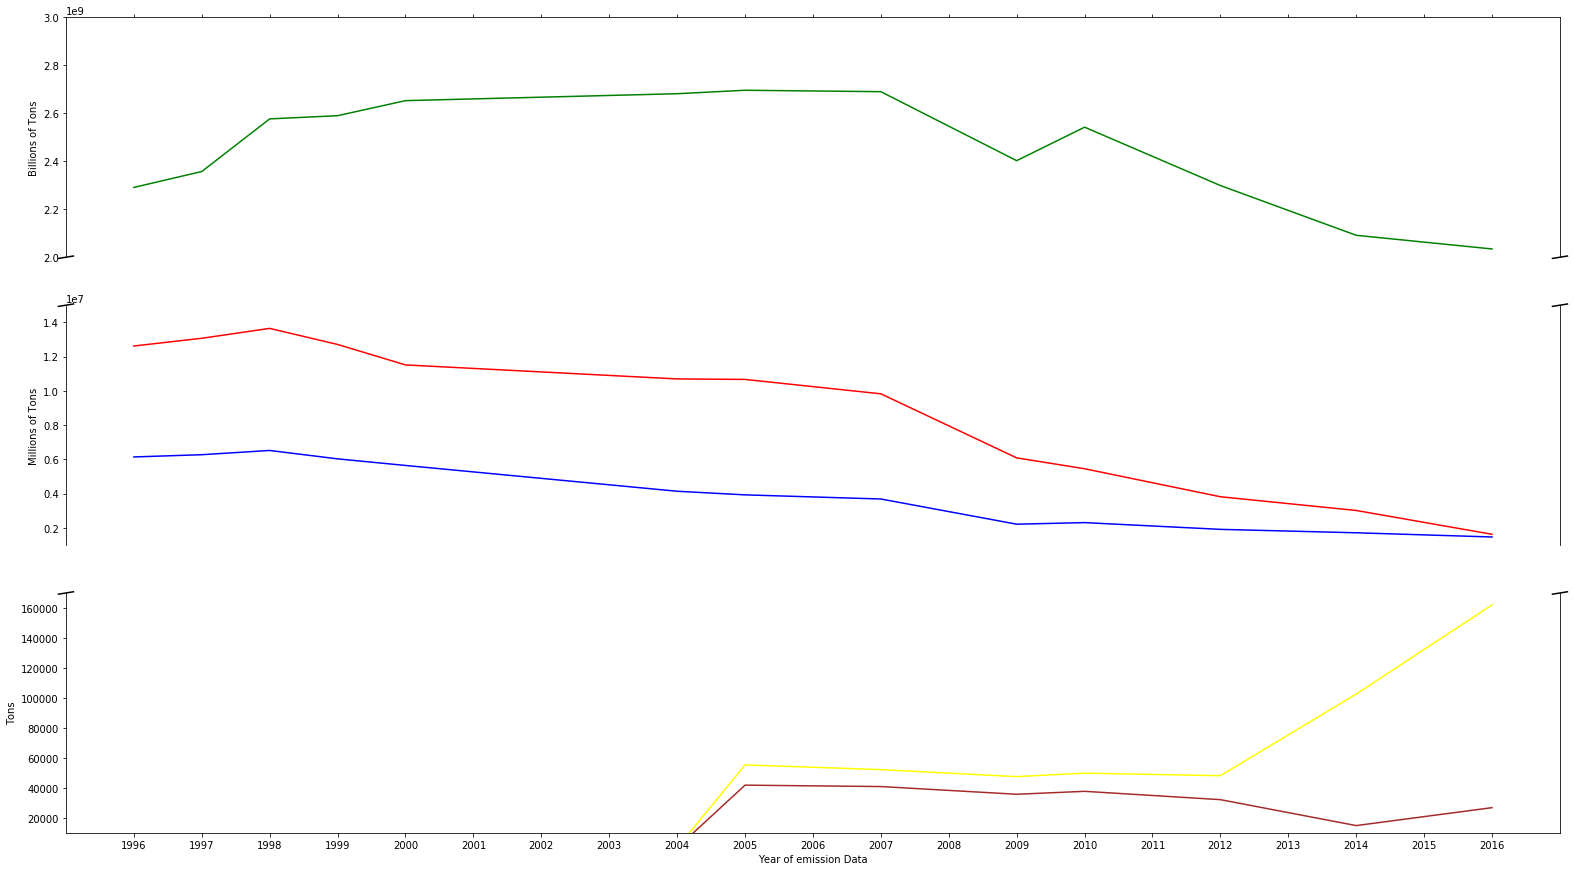

In [46]:
#######   Robby emission stuff   ##############
yearly_tons_df = my_tons_df.reset_index()

#yearly_tons_df = my_tons_df.groupby(['Year'])
# yearly_tons_df.head()

yearly_tons_df = my_tons_df.groupby(['Year'])["State annual NOx emissions (tons)", "State annual SO2 emissions (tons)", "State annual CO2 emissions (tons)", "State annual CH4 emissions (tons)", "State annual N2O emissions (tons)"].apply(lambda x : x.astype(float).sum())


yearly_tons_df.reset_index(level=0, inplace=True)
# print(yearly_tons_df)

############## (ax2) for the details of the majority of our data
f, (ax, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15), sharex=True)

############## zoom-in / limit the view to different portions of the data
ax.set_ylim(2000000000, 3000000000)  # outliers only
ax2.set_ylim(1000000, 15000000)  # most of the data
ax3.set_ylim(10000, 170000) # the (previously) pounds

ax2.plot(yearly_tons_df['Year'], yearly_tons_df['State annual NOx emissions (tons)'], color="blue", label="State annual NOx emissions (tons)")
ax2.plot(yearly_tons_df['Year'], yearly_tons_df['State annual SO2 emissions (tons)'], color="red", label="State annual SO2 emissions (tons)")
ax.plot(yearly_tons_df['Year'], yearly_tons_df['State annual CO2 emissions (tons)'], color="green", label="State annual CO2 emissions (tons)")
ax3.plot(yearly_tons_df['Year'], yearly_tons_df['State annual CH4 emissions (tons)'], color="yellow", label="State annual CH4 emissions (tons)")
ax3.plot(yearly_tons_df['Year'], yearly_tons_df['State annual N2O emissions (tons)'], color="brown", label="State annual N2O emissions (tons)")

#this sets the labels of units on the x-axis, starting at the lowest "Year" Value, to the highest, incremented by 1
plt.xticks(np.arange(min(yearly_tons_df["Year"]), max(yearly_tons_df["Year"]) + 1, 1))

d = .005
kwargs = dict(transform=ax.transAxes, color='black', clip_on=False )
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax3.transAxes)
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# This is where I put the part about a break in the Y-axis grid
ax.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off', grid_alpha=0)  # don't put tick labels at the top
ax2.tick_params(bottom=False)  # don't put tick labels at the top
ax3.xaxis.tick_bottom()


#Inputs legend into the plot
#plt.legend()

#this expands the plot to be a reasonable size within the page
plt.subplots_adjust(right=2.2)

# plot titles
#plt.title("Plot of Emission Rates")
plt.xlabel("Year of emission Data")
ax.set_ylabel("Billions of Tons")
ax2.set_ylabel("Millions of Tons")
ax3.set_ylabel("Tons")

plt.show   

# plt.savefig("images/project1_group.png", bbox_inches = 'tight')

Energy Source Generation Data

We isolated by type of producer in order to consolidate the data, broken into the most prominent energy sources of natural gas and coal. Further data manipulation and consolidation was needed to make the data both readable and usable.

In [ ]:
#Energy generation stuff 
#isolate type of producer
scotts_total_power = eai_df[eai_df["TYPE OF PRODUCER"]=="Total Electric Power Industry"]
# scotts_total_power.head()

#group by the important stuff
scotts_total_power_df = scotts_total_power.groupby(["YEAR", "STATE", "ENERGY SOURCE"]).sum()
# scotts_total_power_df.head(10000)

#isolate type of energy source
Coal =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Coal"] 
Petroleum =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Petroleum"] 
Nuclear =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Nuclear"]
Natural_gas =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Natural Gas"] 
Hydroelectric =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Hydroelectric Conventional"] 
Other_biomass =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Other Biomass"] 
Other =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Other"]
Total =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Total"] 

#group the types of energy sources by state
Coal_group = Coal.groupby(["YEAR","STATE"])
Petroleum_group =Petroleum.groupby(["YEAR","STATE"])
Nuclear_group =Nuclear.groupby(["YEAR","STATE"])
Natural_gas_group =Natural_gas.groupby(["YEAR","STATE"])
Hydroelectric_group =Hydroelectric.groupby(["YEAR","STATE"])
Other_biomass_group =Other_biomass.groupby(["YEAR","STATE"])
Other_group =Other.groupby(["YEAR","STATE"])
Total_group =Total.groupby(["YEAR","STATE"])

#lets see what the cleaned data looks like
# Coal_group.head(15)

In [ ]:
#isolate type of producer
scotts_total_power = eai_df[eai_df["TYPE OF PRODUCER"]=="Total Electric Power Industry"]
scotts_total_power.head()

#group by the important stuff
#scotts_total_power_df = scotts_total_power.groupby(["YEAR", "STATE", "ENERGY SOURCE"]).sum()
#scotts_total_power_df.head(10000)

#isolate type of energy source
Coal =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Coal"] 

Natural_gas =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Natural Gas"] 

Total =scotts_total_power[scotts_total_power["ENERGY SOURCE"] =="Total"] 


# Coal_1990 = Coal[Coal["YEAR"] == 1990]
# Coal_1991 = Coal[Coal["YEAR"] == 1991]
# Coal_1992 = Coal[Coal["YEAR"] == 1992]
# Coal_1993 = Coal[Coal["YEAR"] == 1993]
# Coal_1994 = Coal[Coal["YEAR"] == 1994]
# Coal_1995 = Coal[Coal["YEAR"] == 1995]
# Coal_1996 = Coal[Coal["YEAR"] == 1996]
# Coal_1997 = Coal[Coal["YEAR"] == 1997]
# Coal_1998 = Coal[Coal["YEAR"] == 1998]
# Coal_1999 = Coal[Coal["YEAR"] == 1999]
Coal_2000 = Coal[Coal["YEAR"] == 2000]
Coal_2001 = Coal[Coal["YEAR"] == 2001]
Coal_2002 = Coal[Coal["YEAR"] == 2002]
Coal_2003 = Coal[Coal["YEAR"] == 2003]
Coal_2004 = Coal[Coal["YEAR"] == 2004]
Coal_2005 = Coal[Coal["YEAR"] == 2005]
Coal_2006 = Coal[Coal["YEAR"] == 2006]
Coal_2007 = Coal[Coal["YEAR"] == 2007]
Coal_2008 = Coal[Coal["YEAR"] == 2008]
Coal_2009 = Coal[Coal["YEAR"] == 2009]
Coal_2010 = Coal[Coal["YEAR"] == 2010]
Coal_2011 = Coal[Coal["YEAR"] == 2011]
Coal_2012 = Coal[Coal["YEAR"] == 2012]
Coal_2013 = Coal[Coal["YEAR"] == 2013]
Coal_2014 = Coal[Coal["YEAR"] == 2014]
Coal_2015 = Coal[Coal["YEAR"] == 2015]
Coal_2016 = Coal[Coal["YEAR"] == 2016]
Coal_2017 = Coal[Coal["YEAR"] == 2017]

Natural_gas2000 = Natural_gas[Natural_gas["YEAR"] == 2000]
Natural_gas2001 = Natural_gas[Natural_gas["YEAR"] == 2001]
Natural_gas2002 = Natural_gas[Natural_gas["YEAR"] == 2002]
Natural_gas2003 = Natural_gas[Natural_gas["YEAR"] == 2003]
Natural_gas2004 = Natural_gas[Natural_gas["YEAR"] == 2004]
Natural_gas2005 = Natural_gas[Natural_gas["YEAR"] == 2005]
Natural_gas2006 = Natural_gas[Natural_gas["YEAR"] == 2006]
Natural_gas2007 = Natural_gas[Natural_gas["YEAR"] == 2007]
Natural_gas2008 = Natural_gas[Natural_gas["YEAR"] == 2008]
Natural_gas2009 = Natural_gas[Natural_gas["YEAR"] == 2009]
Natural_gas2010 = Natural_gas[Natural_gas["YEAR"] == 2010]
Natural_gas2011 = Natural_gas[Natural_gas["YEAR"] == 2011]
Natural_gas2012 = Natural_gas[Natural_gas["YEAR"] == 2012]
Natural_gas2013 = Natural_gas[Natural_gas["YEAR"] == 2013]
Natural_gas2014 = Natural_gas[Natural_gas["YEAR"] == 2014]
Natural_gas2015 = Natural_gas[Natural_gas["YEAR"] == 2015]
Natural_gas2016 = Natural_gas[Natural_gas["YEAR"] == 2016]
Natural_gas2017 = Natural_gas[Natural_gas["YEAR"] == 2017]


Total2000 = Total[Total["YEAR"] == 2000]
Total2001 = Total[Total["YEAR"] == 2001]
Total2002 = Total[Total["YEAR"] == 2002]
Total2003 = Total[Total["YEAR"] == 2003]
Total2004 = Total[Total["YEAR"] == 2004]
Total2005 = Total[Total["YEAR"] == 2005]
Total2006 = Total[Total["YEAR"] == 2006]
Total2007 = Total[Total["YEAR"] == 2007]
Total2008 = Total[Total["YEAR"] == 2008]
Total2009 = Total[Total["YEAR"] == 2009]
Total2010 = Total[Total["YEAR"] == 2010]
Total2011 = Total[Total["YEAR"] == 2011]
Total2012 = Total[Total["YEAR"] == 2012]
Total2013 = Total[Total["YEAR"] == 2013]
Total2014 = Total[Total["YEAR"] == 2014]
Total2015 = Total[Total["YEAR"] == 2015]
Total2016 = Total[Total["YEAR"] == 2016]
Total2017 = Total[Total["YEAR"] == 2017]

#drop the US total in all of them, 42963
Coal_2000_js = Coal_2000.drop([16792])
Coal_2005_js = Coal_2005.drop([25640])
Coal_2010_js = Coal_2010.drop([34962])
Coal_2014_js = Coal_2014.drop([42963]) 

The bar charts are for showing the energy generation by state limited to the four years selected by the mortality data in order to compare like datasets. The line charts help visualize the data over time.

In [ ]:
#make a bar plot of the data by state
y_axis = Coal_2000_js['GENERATION (Megawatthours)']
x_axis = Coal_2000_js["STATE"]

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [ ]:
#make a bar plot of the data for 2005
y_axis = Coal_2005_js['GENERATION (Megawatthours)']
x_axis = Coal_2005_js["STATE"]

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [ ]:
#make a bar plot of the data for 2010
y_axis = Coal_2010_js['GENERATION (Megawatthours)']
x_axis = Coal_2010_js["STATE"]

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [ ]:
#make a bar plot of the data for 2014
y_axis = Coal_2014_js['GENERATION (Megawatthours)']
x_axis = Coal_2014_js["STATE"]

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")
plt.subplots_adjust(right = 3)

In [ ]:
#make a plot for all 
x_axis = Coal["YEAR"]

# x_axis = Coal_2000_js["STATE"]
tick_location = np.arange(len(x_axis))

#e_2000 = Coal_2000_js["STATE"]

e = Coal["GENERATION (Megawatthours)"]
# e_2005 = Coal_2005_js["GENERATION (Megawatthours)"]
# print(x_axis)
# print(Coal_2000_js["STATE"])

plt.plot(x_axis, e)
# plt.plot(x_axis, e_2005)
# plt.subplots_adjust(right = 3)

In [ ]:
statelist = Coal['STATE'].unique()

newdf = Coal.loc[Coal['STATE'] != '  '  ]
newdf = newdf.loc[newdf['STATE'] != 'US-Total' ]
newdf = newdf.loc[newdf['STATE'] != 'US-TOTAL' ]

for state in statelist:
    dataset = newdf[newdf["STATE"] == state]
    x_axis = dataset["YEAR"]

    e_2000 = dataset["GENERATION (Megawatthours)"]
    plt.plot(x_axis, e_2000)
    plt.subplots_adjust(right = 2)
# e_2005 = Coal_2005_js["GENERATION (Megawatthours)"]
# print(x_axis)
# print(Coal_2000_js["STATE"])